[View in Colaboratory](https://colab.research.google.com/github/jy617lee/TWL/blob/master/%EC%9E%90%EB%A3%8C%EC%9D%98_%EC%9A%94%EC%95%BD%EA%B3%BC_Pandas_%EA%B3%BC%EC%A0%9C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb)

In [0]:
!pip install --upgrade -q gspread

import pandas as pd

from google.colab import auth

auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials


def get_sheet(title, sheet_name):
  gc = gspread.authorize(GoogleCredentials.get_application_default())
  return gc.open(title).worksheet(sheet_name)

# 자료의 요약 시트 불러오기

In [0]:
# 자료의 요약에 있는 특정 시트를 불러옵니다.
# 1번 row를 0번 인덱스로 읽어오는 데, 0번 인덱스를 컬럼으로 지정해 주도록 했습니다.
# 그러면 스프레드시트에서 봤던 것 처럼 데이터프레임이 생성됩니다.
def get_df(sheet_name):
  sheet = get_sheet('자료의 요약', sheet_name)

  # Create dataframe from the sheet
  rows = sheet.get_all_values()
  df = pd.DataFrame.from_records(rows)

  df.columns = df.iloc[0]
  df = df.reindex(df.index.drop(0))
  return df

# Plotnine 라이브러리, 폰트 설치하기


In [5]:
!pip install -q 'plotnine[all]'
!pip show plotnine

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

from plotnine import *
import plotnine

import pandas as pd
import numpy as np

# 불필요한 warnings을 찍지 않기 위해 import 해왔습니다. 
import warnings
warnings.filterwarnings('ignore')

Name: plotnine
Version: 0.3.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: Hassan Kibirige
Author-email: has2k1@gmail.com
License: GPL-2
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, patsy, matplotlib, pandas, six, mizani, statsmodels, numpy
Required-by: 




/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 혈액형

In [38]:
df_blood = get_df('혈액형')
# 상위 5개의 데이터를 가져옵니다.
print(df_blood.shape)
df_blood.head()

(22, 1)


,혈액형
1,A
2,A
3,B
4,AB
5,O


## 원형 차트

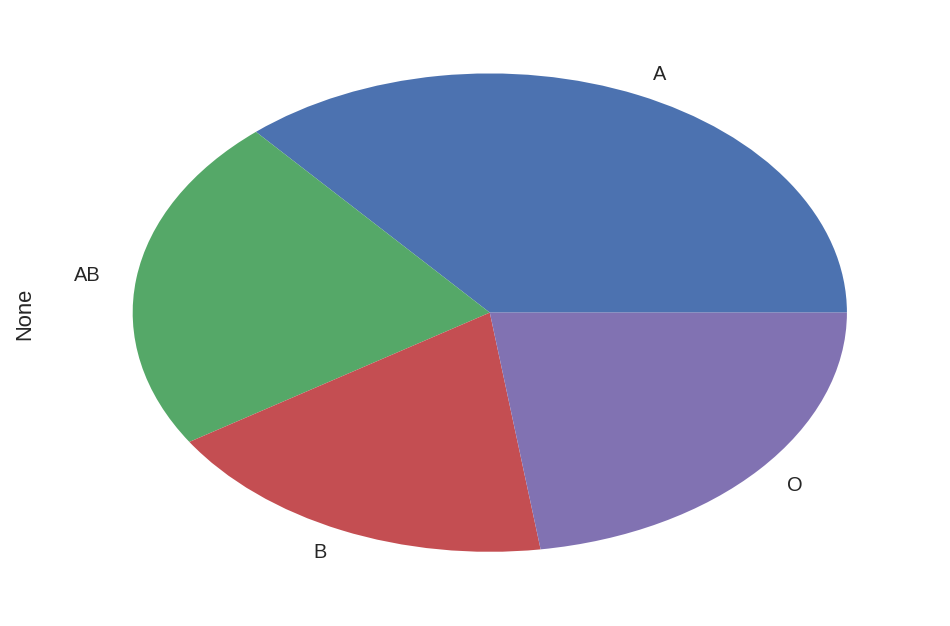

In [55]:
# size를 이용해 같은 값을 가진 row를 합산하기
df_blood_group = df_blood.groupby('혈액형').size()
df_blood_group.plot.pie()

# todo : 저 옆에 None을 어떻게 없애지?

## 막대 그래프

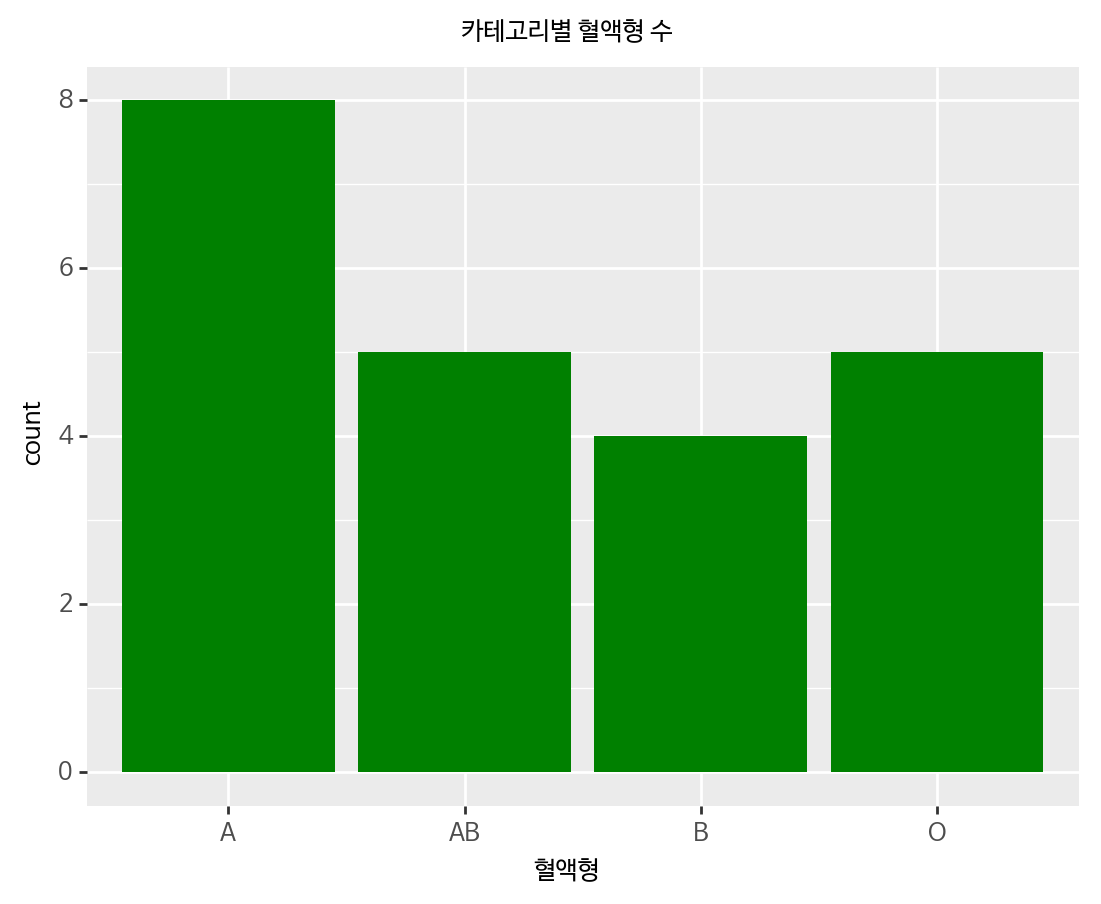

<ggplot: (8789060905199)>

In [56]:
(ggplot(df_blood)
 + aes(x='혈액형')
 + geom_bar(fill='green')
 + ggtitle('카테고리별 혈액형 수')
 + theme(text=element_text(fontproperties=font))
)

# 화장지 불량률
## 파레토그림
파레토 그림은 불량, 결점, 고장 등의 발생건수를 분류 항목별로 나누어 불량 개수나 손실금액 등을 크기 순서대로 나열 후 막대그래프로 나타낸 그림을 말한다

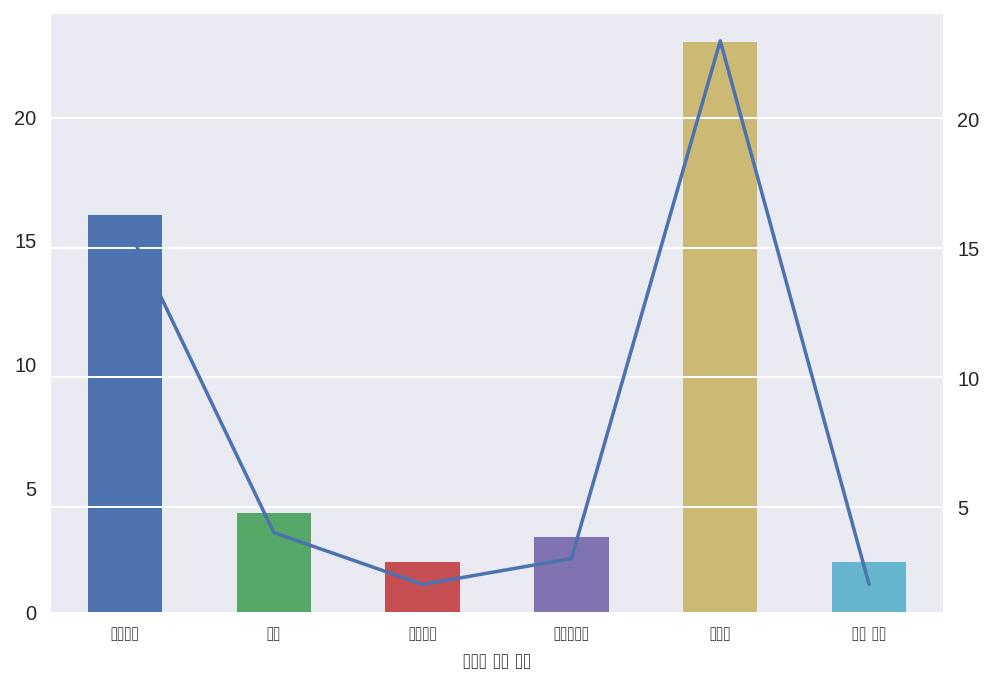

In [64]:
df_tissue = get_df('화장지 불량률')

df_tissue_kind = df_tissue.groupby('화장지 불량 종류').size()
df_tissue_kind
df_tissue_kind.plot(kind='bar')
df_tissue_kind.plot(secondary_y=True)

# to do 이게 파레토그림이 맞나요??

# 조선왕

## 히스토그램

In [0]:
df_king = get_df('조선왕')

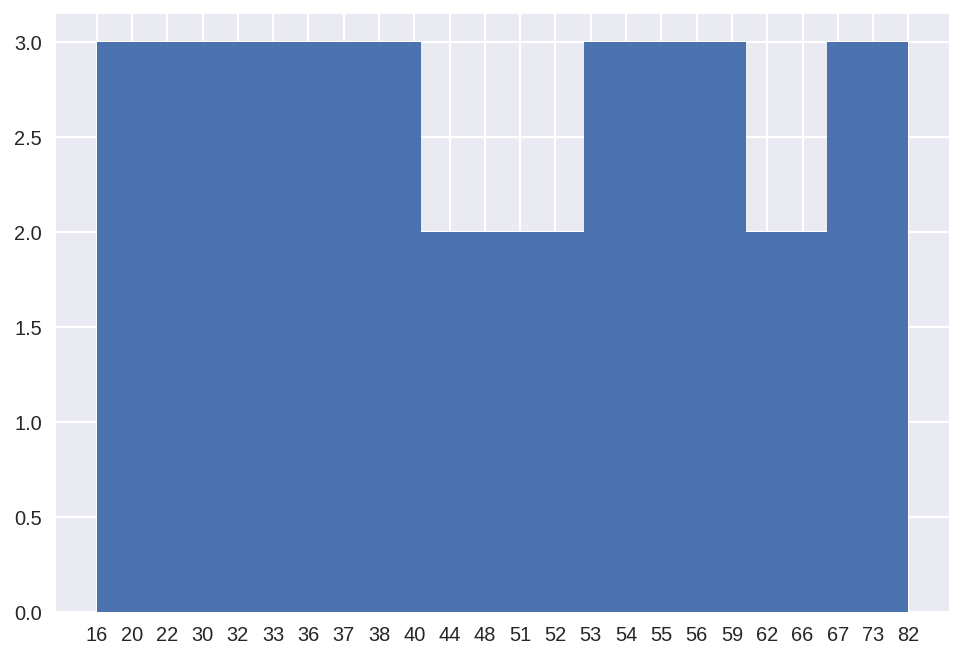

In [89]:
df_king['life'].hist()

## BoxPlots

자료로부터 얻는 다섯가지의 요약수치인 최소값, 사분위수(Q1, Q2, Q3), 최대값을 가지고 그림을 그린 것

In [103]:
df_king.head()

,name,life,period
1,태조,73,7
2,정종,62,2
3,태종,55,18
4,세종,53,32
5,문종,38,2


In [132]:
df_king['life'] = df_king['life'].astype(int)
df_king['period'] = df_king['period'].astype(int)
df_king_pivot = pd.DataFrame(columns=['name', 'kind', 'year'])
for index, row in df_king.iterrows():
  print(row['name'])

태조
정종
태종
세종
문종
단종
세조
예종
성종
연산
중종
인종
명종
선조
광해
인조
효종
현종
숙종
경종
영조
정조
순조
헌종
철종
고종
순종


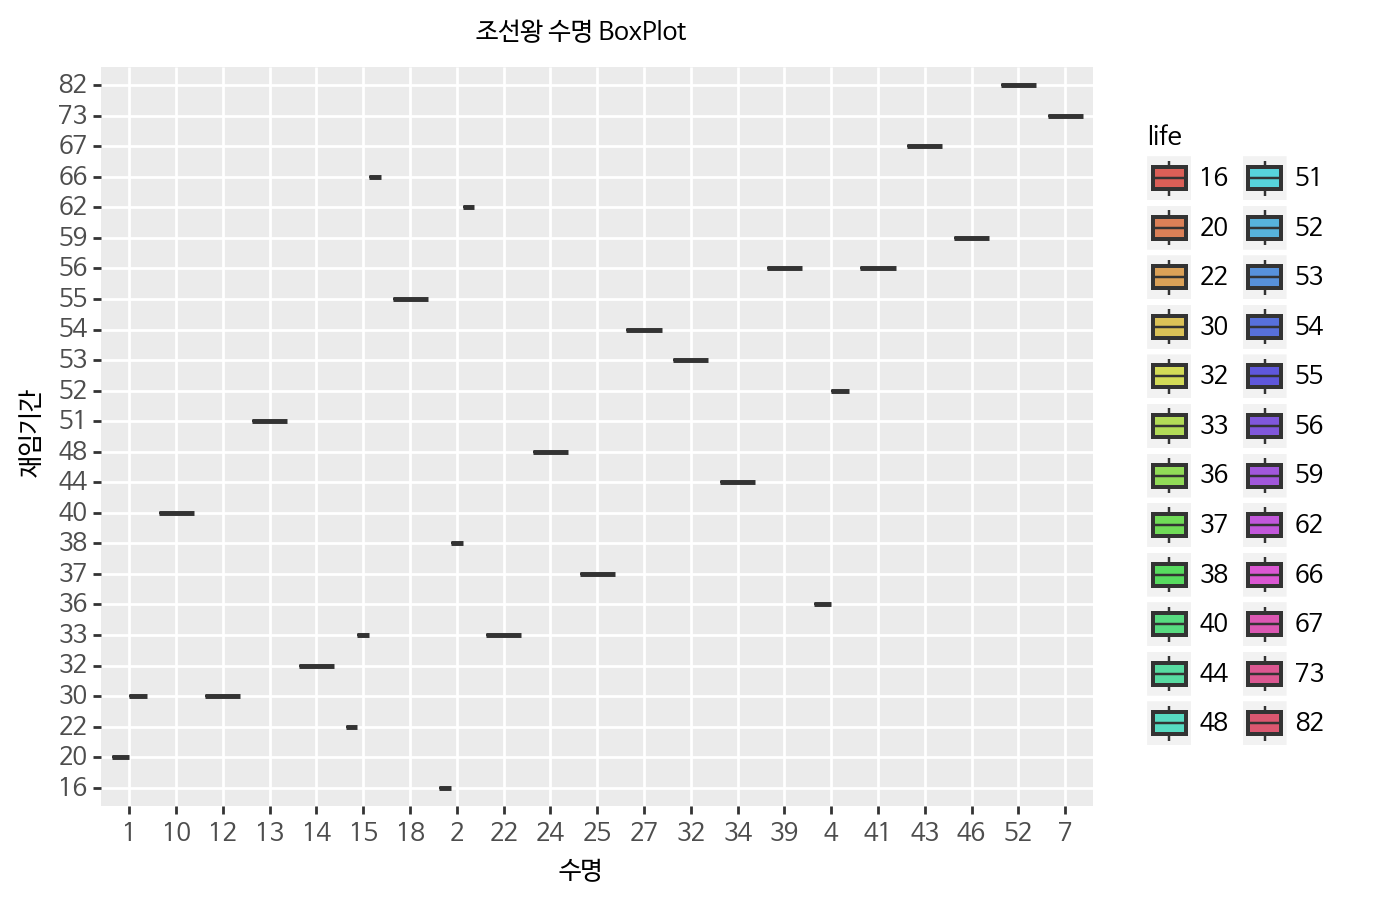

<ggplot: (-9223363247796867412)>

In [100]:
(ggplot(df_king, 
   aes(x='period', y='life', fill='life'))
 + geom_boxplot()
 + labs(y='재임기간', x='수명', title='조선왕 수명 BoxPlot')
 + theme(text=element_text(fontproperties=font))
)

# GNP
## 지도 그림 그리기

In [86]:
import plotly.plotly as py
df_gnp = get_df('GNP')

# to do... ㅜㅜ 못하겠당

(8, 2)


,국가,GNP대비 교육비 지출 비율
1,한국,4.4
2,일본,4
3,미국,5.3
4,타이완,5.7
5,캐나다,7.6


# 타이타닉

In [87]:
df_titanic = get_df('타이타닉')
print(df_titanic.shape)
# 상위 5개의 데이터를 가져옵니다.
df_titanic.head()

(101, 2)


,Class,생존여부
1,crew,no
2,3등급,no
3,crew,no
4,crew,no
5,1등급,yes


In [0]:
# 어떤 컬럼이 있는지 보여줍니다.
df_titanic.columns

In [0]:
# 컬럼 정보를 보여줍니다.
df_titanic.info()

In [0]:
# 자료의 요약을 보여줍니다.
df_titanic.describe()

In [0]:
df_titanic['Class'].value_counts()

In [0]:
df_titanic['생존여부'].value_counts()

# 포유류

In [0]:
import matplotlib as mpl
import matplotlib.pylab as plt
mpl.rc('font', family='Nanum Gothic')
mpl.rc('axes', unicode_minus=False)

#포유류의 몸무게와 뇌무게는 연관이 있을까?
df_animal = get_df('포유류')
df_animal.info()
df_animal['몸무게'] = df_animal['몸무게'].astype(float)
df_animal['뇌무게'] = df_animal['뇌무게'].astype(float)
df = pd.DataFrame(df_animal)
plt.title("포유류의 뇌무게와 몸무게")
plt.plot(df_animal)

# 집값
## Box Plot

In [93]:
df_house = get_df('집 값')
df_house['주택가격'] = df_house['주택가격'].astype(float)
df_house.groupby(df_house['도심&외각']).sum()

,주택가격
도심&외각,
inner,5067.0
outer,6334.6
